In [1]:
from paos import PSD
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
phi_x = 110.0  # mm
phi_y = 73.0  # mm
zoom = 4
wl = 0.550
D = zoom * np.max([phi_x, phi_y])
grid = 1024
delta = D / grid

A, B, C, fknee, fmin, fmax = 7.0, 0.0, 1.5, 1.0, 1 / 20, 1 / 2
SR = 0.0

x = y = np.arange(-grid // 2, grid // 2) * delta
xx, yy = np.meshgrid(x, y)
pupil = np.zeros((grid, grid))

mask = (2 * xx / phi_x) ** 2 + (2 * yy / phi_y) ** 2 <= 1
pupil[mask] = 1.0
wfo = np.ma.masked_array(pupil, mask=~mask)

fx = np.fft.fftfreq(wfo.shape[0], delta)
fxx, fyy = np.meshgrid(fx, fx)
f = np.sqrt(fxx**2 + fyy**2)
f[f == 0] = 1e-100

wfo_ = PSD(wfo, A, B, C, f, fknee, fmin, fmax, SR, units=u.nm)

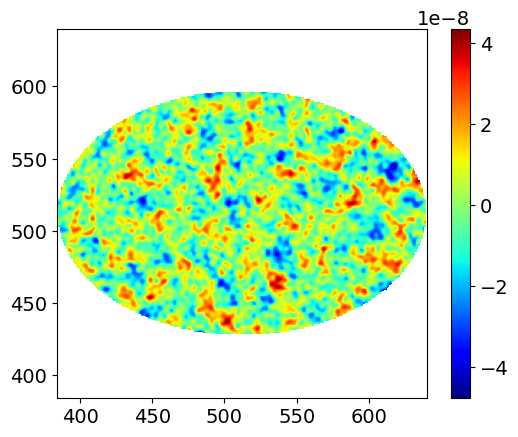

In [3]:
plt.figure()
plt.imshow(wfo_(), cmap="jet", origin="lower")
plt.xlim(grid // 2 - grid // (2 * zoom), grid // 2 + grid // (2 * zoom))
plt.ylim(grid // 2 - grid // (2 * zoom), grid // 2 + grid // (2 * zoom))
plt.colorbar()
plt.show()